# RDKit Generals
[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Stef0916/chemoinformatics-bioinformatics/blob/main/cheminformatics-workflow/notebooks/1-RDKit-general.ipynb)

## RDKit Overview

In order to use chemistry as a tool in drug design, molecular screening, predictive modeling, and to implement machine learning algorithms using molecular architecture as input, among other applications, we need a tool that can translate molecular features into code to manipulate the chemical information. This is where RDKit comes into play. RDKit is an open-source collection of software tools designed for cheminformatics, computational biology, and computational chemistry. It provides functionalities for molecular modeling, visualization, and cheminformatics.

### Features:
1. <u>Molecular Modeling and Visualization:</u> Allows users to create, edit, and visualize molecular structures.
2. <u>Substructure Searching:</u> It can identify molecules that contain a particular structural fragment.
3. <u>Descriptors and Fingerprints:</u> Provides tools for computing molecular descriptors and fingerprints.
4. <u>Machine Learning Integration:</u> Integrate with popular machine learning libraries, enabling predictive modeling.

Here is the webpage with the full documentation: https://www.rdkit.org/

## 1. Installation in Google Colab

In [1]:
!pip install rdkit-pypi

In [2]:
!pip install mols2grid #to visualize in a grid

## 2. Import Libraries

In [3]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole, MolsToGridImage
from rdkit.Chem import Draw
from rdkit.Chem import rdDepictor
IPythonConsole.ipython_useSVG = True
rdDepictor.SetPreferCoordGen(True)
from rdkit.Chem import PandasTools
import mols2grid

### RDKit Modules and Functions:

1. **Chem**: The core module of RDKit, used for creating and manipulating molecular structures.
2. **DataStructs**: Provides functionalities for handling molecular fingerprints and calculating similarities.
3. **IPythonConsole**: Enables molecule visualization directly in notebooks.
4. **MolsToGridImage**: A function to display multiple molecules in a grid format.
5. **Draw**: Contains functions for drawing and visualizing molecules.
6. **rdDepictor**: Contains functions related to molecule depiction.
7. **PandasTools**: Provides functionalities to integrate RDKit with pandas, such as adding molecule columns to DataFrames.
8. **Descriptors**: Contains various molecular descriptor calculation functions.
9. **MoleculeDescriptors**: Used for calculating a set of descriptors for molecules.
10. **AllChem**: A module that contains a variety of cheminformatics tools, including functions for generating fingerprints.

### Configuration:

- `IPythonConsole.ipython_useSVG = True`: Configures RDKit to use SVG (Scalable Vector Graphics) for rendering molecules in notebooks, providing clearer images.
- `rdDepictor.SetPreferCoordGen(True)`: Sets the preferred coordinate generation method for molecule depiction.

### Additional Libraries:

- **mols2grid**: A library for displaying molecules in a grid format.


## 3. Representing Molecules

### 3.1 SMILES

- Representing molecules as strings is done with SMILES. Simplified molecular-input line-entry system (SMILES) is a string based representation of a molecule in a simple and concise text format. It is a linear notation, which means that it represents molecules as a sequence of characters, including letters and numbers, to describe the arrangement of atoms and bonds within the molecule.
- In SMILES notation, atoms are represented by their chemical symbols (e.g., "C" for carbon, "H" for hydrogen, "O" for oxygen) and connected by bond symbols (e.g., "-" for a single bond, "=" for a double bond, "#" for a triple bond). Additionally, parentheses and numbers are used to indicate branching and repeating structures within the molecule.

To represent molecules, we need to transform it from molecular respresentantion into SMILES by calling the `Chem.MolFromSmiles`

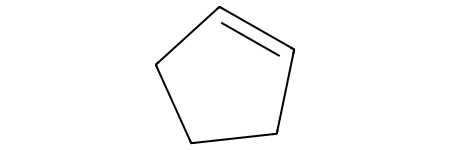

In [4]:
# Create a molecule object from SMILES notation.
mol = Chem.MolFromSmiles("C1CCC=C1")
mol

From here, we can ask for the number of atoms.

In [5]:
num_atoms = mol.GetNumAtoms()
num_atoms

5

And the atoms within the molecular struture.

In [6]:
atoms = [atom for atom in mol.GetAtoms()]
atom_symbols = [atom.GetSymbol() for atom in atoms]
atom_symbols

['C', 'C', 'C', 'C', 'C']

And the atomic number.

In [7]:
for idx, atom in enumerate(atoms):
  print(f"Atom {idx + 1} has atomic number of {atom.GetAtomicNum()}")

Atom 1 has atomic number of 6
Atom 2 has atomic number of 6
Atom 3 has atomic number of 6
Atom 4 has atomic number of 6
Atom 5 has atomic number of 6


We can also retieve the bond between the atoms and the type.

In [8]:
bonds = mol.GetBonds()

for bond in bonds:
    begin_atom_idx = bond.GetBeginAtomIdx()
    end_atom_idx = bond.GetEndAtomIdx()
    bond_type = bond.GetBondType()

    print(f"Bond between atom {begin_atom_idx} and atom {end_atom_idx}, Bond type: {bond_type}")

Bond between atom 0 and atom 1, Bond type: SINGLE
Bond between atom 1 and atom 2, Bond type: SINGLE
Bond between atom 2 and atom 3, Bond type: SINGLE
Bond between atom 3 and atom 4, Bond type: DOUBLE
Bond between atom 4 and atom 0, Bond type: SINGLE


We can also add the atom indices.

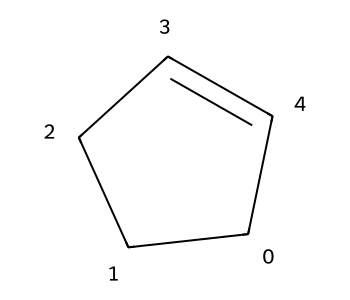

In [9]:
opts = Draw.MolDrawOptions()
opts.addAtomIndices = True
Draw.MolToImage(mol,size=(350,300),options=opts)

Triple bonds are represented by #

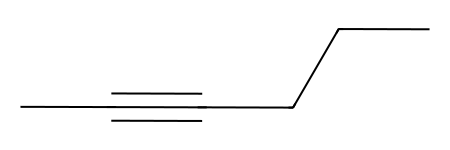

In [10]:
mol2 = Chem.MolFromSmiles('CCCC#CC')
mol2

SMILES notation doesn't include explicit "H" atoms, hydrogens are usually implicit. SMILES notation often omits hydrogen atoms on carbon and some other elements unless they are explicitly specified.

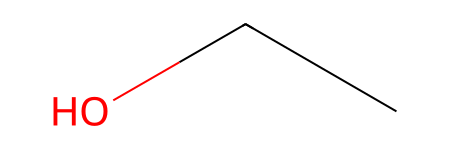

In [11]:
mol3 = Chem.MolFromSmiles("CCO")
mol3

We can implicitly represent the H atom associated to a heavy atom by adding them with square brakets: [H]

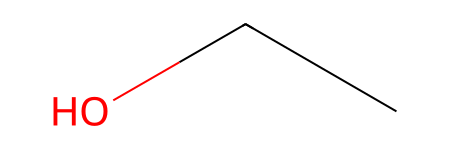

In [12]:
mol3 = Chem.MolFromSmiles("CCO[H]")
mol3

To add charges, we'll have to do it by adding "+" or "-" in square brackets besides de atom type.

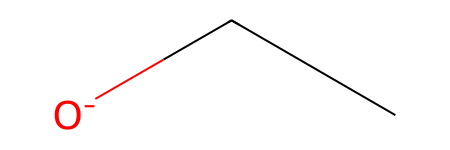

In [13]:
mol4 = Chem.MolFromSmiles("CC[O-]")
mol4

We can also have disconnected molecules within the same representation, like adding salts for example. We need to separe the molecules with a '.' between them.

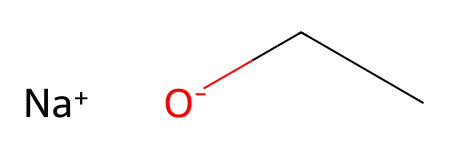

In [14]:
mol5 = Chem.MolFromSmiles("CC[O-].[Na+]")
mol5

The branching in SMILES is represented by adding the atom between parenthesis.

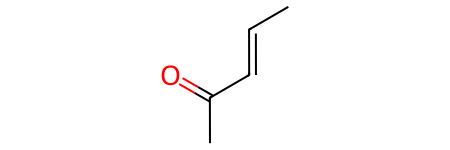

In [15]:
mol6 = Chem.MolFromSmiles("CC=CC(=O)C")
mol6

Rings, as we saw before, are represented by numbering the atoms that are connected. In fused ring systems, a single atom can have different ring connections.

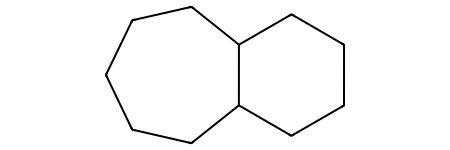

In [16]:
mol7 = Chem.MolFromSmiles('C12CCCCC1CCCCC2')
mol7

We can use the same atom closing the ring, to indicate the closure of another ring.

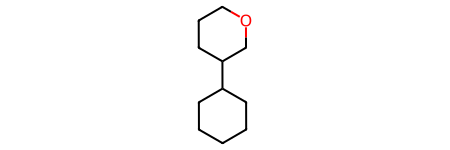

In [17]:
mol8 = Chem.MolFromSmiles('C1CCCCC1C1CCCOC1')
mol8

Aromatics are represented by the lower case in SMILES notation. If, an heteroatom within the ring has hydrogen attached, we need to specify it.

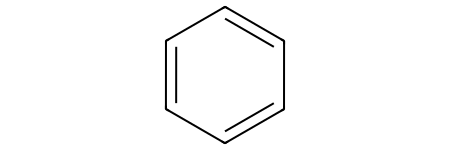

In [18]:
mol9 = Chem.MolFromSmiles('c1ccccc1')
mol9

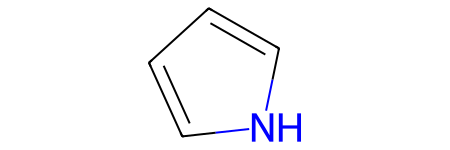

In [19]:
mol10 = Chem.MolFromSmiles('c1c[nH]cc1')
mol10

Sterochemistry is inticated with @ for clockwise and @@ for anticlockwise and the atom should go between square brackets.

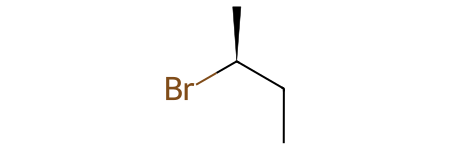

In [20]:
mol11 = Chem.MolFromSmiles('CC[C@H](C)(Br)')
mol11

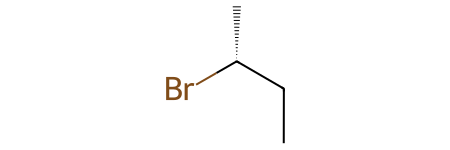

In [21]:
mol12 = Chem.MolFromSmiles('CC[C@@H](C)(Br)')
mol12

Finally, the isomerism of double bonds is specify by '/' and '\\'
-

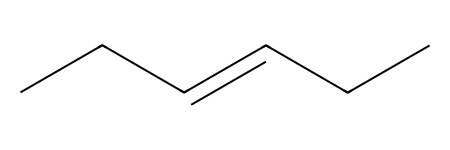

In [22]:
mol13 = Chem.MolFromSmiles('CC/C=C/CC')
mol13

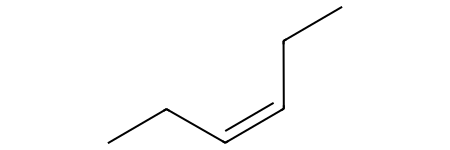

In [23]:
mol14 = Chem.MolFromSmiles('CC/C=C\CC')
mol14

Now, we can put all our molecules into a list to continue working with them.

In [24]:
smiles = ['C1CCC=C1', 'CCCC#CC', 'CCO', 'CC[O-]', 'CC[O-].[Na+]', 'CC=CC(=O)C',
          'C12CCCCC1CCCCC2', 'C1CCCCC1C1CCCOC1', 'c1ccccc1', 'c1c[nH]cc1',
          'CC[C@H](C)(Br)', 'CC[C@@H](C)(Br)', 'CC/C=C/CC', 'CC/C=C\CC']

In [25]:
mol_list = [Chem.MolFromSmiles(element) for element in smiles]
mol_list

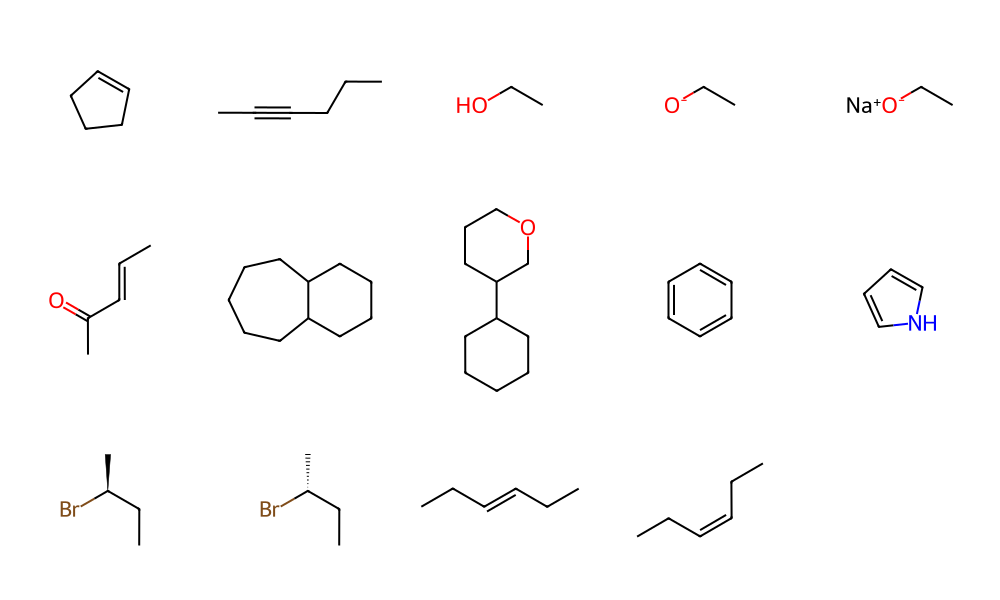

In [26]:
Draw.MolsToGridImage(mol_list,molsPerRow=5,useSVG=True,subImgSize=(200,200))

We can create a DataFrame based on the SMILES of the molecules, which is very convenient.

In [27]:
smiles_df = pd.DataFrame(smiles, columns=['SMILES'])
smiles_df

,SMILES
0,C1CCC=C1
1,CCCC#CC
2,CCO
3,CC[O-]
4,CC[O-].[Na+]
5,CC=CC(=O)C
6,C12CCCCC1CCCCC2
7,C1CCCCC1C1CCCOC1
8,c1ccccc1
9,c1c[nH]cc1


In [28]:
smiles_df.dtypes

SMILES    object
dtype: object

Or, we can display the molecules directly into a grid using a DataFrame.

In [29]:
# Creat a DataFrame from the mol_list
df_mol_list = pd.DataFrame(mol_list, columns=['Molecule'])

In [30]:
# Concatenate with SMILES df
mols_df = pd.concat([smiles_df, df_mol_list], axis = 1)
mols_df

,SMILES,Molecule
0,C1CCC=C1,<rdkit.Chem.rdchem.Mol object at 0x79509b126030>
1,CCCC#CC,<rdkit.Chem.rdchem.Mol object at 0x79509b125e00>
2,CCO,<rdkit.Chem.rdchem.Mol object at 0x79509b125cb0>
3,CC[O-],<rdkit.Chem.rdchem.Mol object at 0x79509b125e70>
4,CC[O-].[Na+],<rdkit.Chem.rdchem.Mol object at 0x79509b125690>
5,CC=CC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x79509b125a80>
6,C12CCCCC1CCCCC2,<rdkit.Chem.rdchem.Mol object at 0x79509b125af0>
7,C1CCCCC1C1CCCOC1,<rdkit.Chem.rdchem.Mol object at 0x79509b125700>
8,c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x79509b125a10>
9,c1c[nH]cc1,<rdkit.Chem.rdchem.Mol object at 0x79509b1258c0>


In [31]:
# Visualize the DataFrame of the molecules within a grid
mols2grid.display(mols_df, mol_col="Molecule", subset = ['SMILES'])

MolGridWidget()

In [32]:
PandasTools.WriteSDF(mols_df, "molecules.sdf", molColName = 'Molecule')

In [33]:
mols_df.to_csv("molecues.csv", index=False)

**Canonical Smiles**

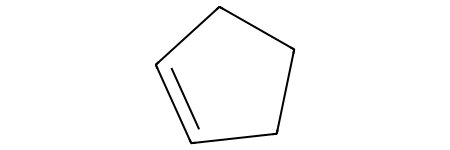

In [34]:
# Example
mol1 = Chem.MolFromSmiles('C1C=CCC1')
mol1

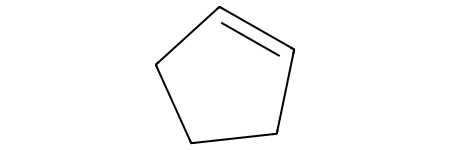

In [35]:
mol2 = Chem.MolFromSmiles('C1CCC=C1')
mol2

In [36]:
are_identical = mol1 == mol2
are_identical

False

There are several ways to represent one molecule using the SMILES notation. This can be a problem if we want to identify unique molecules. In order to avoid this, we need to get the canonical SMILES.

In [37]:
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] # Chem.MolFromSmiles Convert a SMILES to an RDKit molecule object
    smiles = [Chem.MolToSmiles(mol) for mol in mols] # Chem.MolToSmiles converts the molecule back into its canonical SMILES representation
    return smiles

In [38]:
mol1 = canonical_smiles(['C1C=CCC1'])
mol1

['C1=CCCC1']

In [39]:
mol2 = canonical_smiles(['C1CCC=C1'])
mol2

['C1=CCCC1']

In [40]:
are_identical = mol1 == mol2
are_identical

True

In [42]:
canon_smiles = canonical_smiles(mols_df['SMILES'])

In [43]:
mols_df['Canonical SMILES'] = canon_smiles
mols_df

,SMILES,Molecule,Canonical SMILES
0,C1CCC=C1,<rdkit.Chem.rdchem.Mol object at 0x79509b126030>,C1=CCCC1
1,CCCC#CC,<rdkit.Chem.rdchem.Mol object at 0x79509b125e00>,CC#CCCC
2,CCO,<rdkit.Chem.rdchem.Mol object at 0x79509b125cb0>,CCO
3,CC[O-],<rdkit.Chem.rdchem.Mol object at 0x79509b125e70>,CC[O-]
4,CC[O-].[Na+],<rdkit.Chem.rdchem.Mol object at 0x79509b125690>,CC[O-].[Na+]
5,CC=CC(=O)C,<rdkit.Chem.rdchem.Mol object at 0x79509b125a80>,CC=CC(C)=O
6,C12CCCCC1CCCCC2,<rdkit.Chem.rdchem.Mol object at 0x79509b125af0>,C1CCC2CCCCC2CC1
7,C1CCCCC1C1CCCOC1,<rdkit.Chem.rdchem.Mol object at 0x79509b125700>,C1CCC(C2CCCOC2)CC1
8,c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x79509b125a10>,c1ccccc1
9,c1c[nH]cc1,<rdkit.Chem.rdchem.Mol object at 0x79509b1258c0>,c1cc[nH]c1


### 3.2 SMARTS

While SMILES is used to describe the exact structure of a molecule, SMARTS is used to define patterns that can be used for searching within molecules. These patterns can include specific atoms, bonds, connectivity, and other structural features that define how a particular substructure should look.

For example, the SMARTS string C=O will search for all instances of a carbon atom double-bonded to an oxygen atom within a molecule, which is indicative of a carbonyl group.

Here's another example: the SMARTS string `[#6][#7]` matches any carbon atom (`[#6]`) directly bonded to a nitrogen atom (`[#7]`).

In RDKit, we need to specify always the type of bond, even if it’s a single bond. Otherwise, the object doesn’t understand it.
Example: `[C;O]~[C]-[CX2]-[*]` -> Here, the molecules could have a C or an O.
-	The semicolon represents the `OR`, and it’s inferior to `AND`.
-	The comma also represents `OR`, but it’s superior to `AND`.
-	The `~` represents any bond.
-	The `X` simply shows that the C has to have 2 heavy atoms and not more than 2.
-	The `*` means that there could be any atom.

However, the SMART formats are mostly represented by the atomic number `[#8; #7; #16&a]1:[ #6]: [#6;#7]:[#6]:[#6]1-[A]`
-	The fragments are between square brackets
-	`#` represents the atomic number
-	The semicolon represents the `OR`, and it’s inferior to `AND`
-	`&a` represents aromaticity
-	`:` also represents aromaticity
-	`-` represents a single bond
-	`[A]` any aliphatic atom
-	`1` represents the closure of the cycle



In [44]:
smarts_list = [Chem.MolToSmarts(mol) for mol in mol_list]
smarts_list

['[#6]1-[#6]-[#6]-[#6]=[#6]-1',
 '[#6]-[#6]-[#6]-[#6]#[#6]-[#6]',
 '[#6]-[#6]-[#8]',
 '[#6]-[#6]-[#8-]',
 '[#6]-[#6]-[#8-].[Na+]',
 '[#6]-[#6]=[#6]-[#6](=[#8])-[#6]',
 '[#6]12-[#6]-[#6]-[#6]-[#6]-[#6]-1-[#6]-[#6]-[#6]-[#6]-[#6]-2',
 '[#6]1-[#6]-[#6]-[#6]-[#6]-[#6]-1-[#6]1-[#6]-[#6]-[#6]-[#8]-[#6]-1',
 '[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1',
 '[#6]1:[#6]:[#7H]:[#6]:[#6]:1',
 '[#6]-[#6]-[#6@H](-[#6])-[#35]',
 '[#6]-[#6]-[#6@@H](-[#6])-[#35]',
 '[#6]-[#6]/[#6]=[#6]/[#6]-[#6]',
 '[#6]-[#6]/[#6]=[#6]\\[#6]-[#6]']

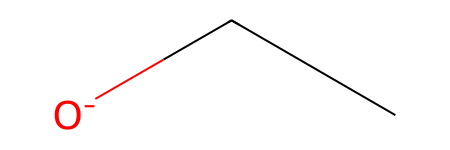

In [45]:
Chem.MolFromSmarts(smarts_list[3])

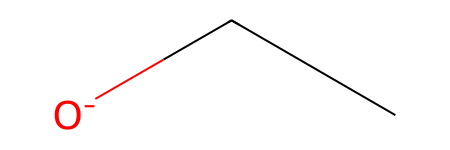

In [46]:
mol_list[3]

### 3.3 Structure-Data File

The weak side of the string representation of the chemical structure has little to no capacity for storing atomic properties (e.g., electronegativity). Thus, certain molecular properties, such as 3D structure, cannot be stored.

It is a complex format for the representation of the chemical structure of multiple compounds. It consists of blocks of blocks called mol blocks that can also function as separate MDL Molfiles (.mol).

Example: 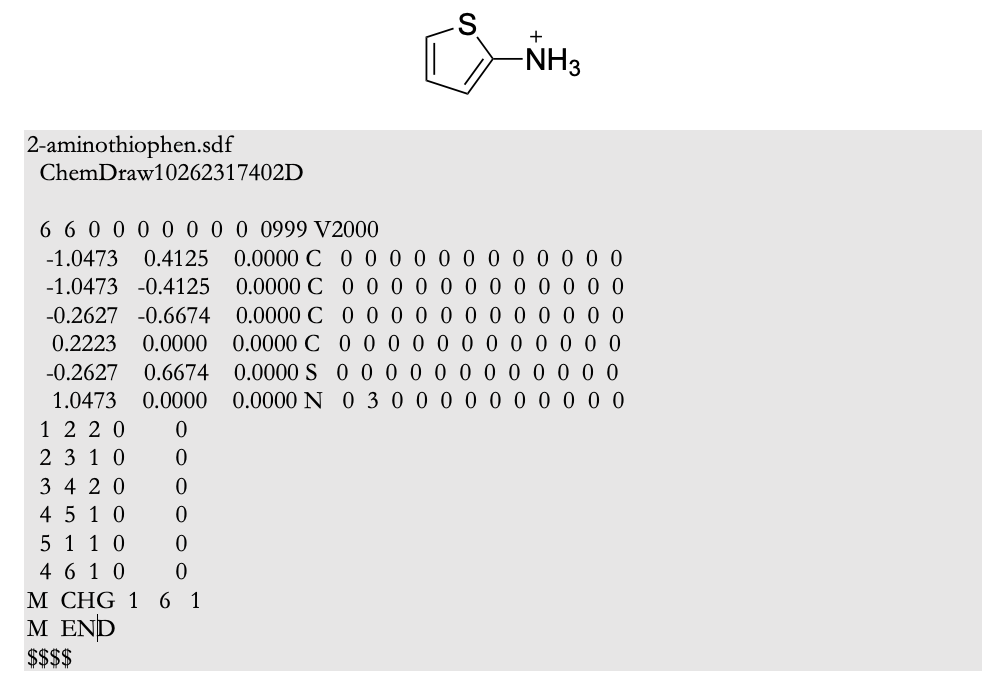

-	This follows the connection, where we can see the connections between the atoms and the coordinates of the atoms on the molecule. If the third column has zeros, then the structure is in 2D.
-	We have the bond blocks where the first 2 columns specify atoms that have the bond. The third is for bond type (single, double, etc), and the last is bond stereo (0 for unspecified).
-	M  CHG  1   6   1 specifies a certain property different from the rest of the atoms. In this case, we have an N, which is positively charged. This means that this is not the default property for that atom. N is, by default, neutral.
-	Every line adds a certain property to atoms, and the block always has to finish with the ‘M END’ line.
-	When the mol blocks end, the property fields that describe the molecule integrally can be present, for example:

$$ [Molecular Weight]: $$
$$99 $$
-	A full description of the molecule always ends with a `$$$$` line.

sdf shows more flexibility when we talk about molecular properties and more descriptions of the molecules.


## 4. Convertion between different file types

#### 4.1 Load the SDF file

In [47]:
# Create an SDF supplier
multiple_compounds = Chem.SDMolSupplier('molecules.sdf')
multiple_compounds

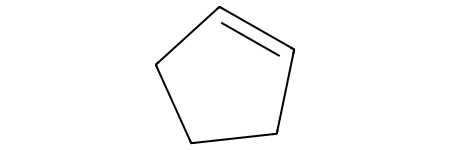

In [48]:
multiple_compounds[0]

We can also import them in a DataFrame using `PandasTool` within RDKit as we did before

In [49]:
multiple_compounds_df = PandasTools.LoadSDF('molecules.sdf', molColName='Molecule')

,ID,Molecule
0,,
1,,
2,,
3,,
4,,
5,,
6,,
7,,
8,,
9,,

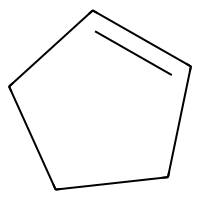
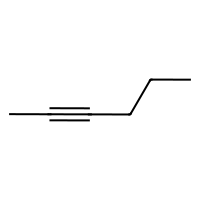
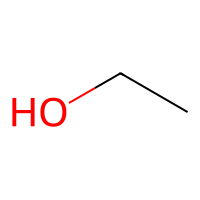
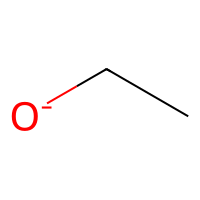
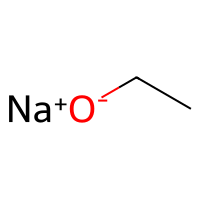
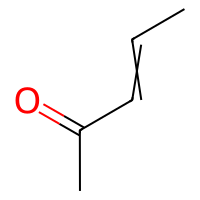
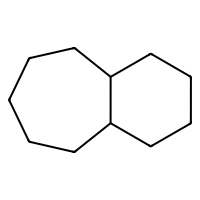
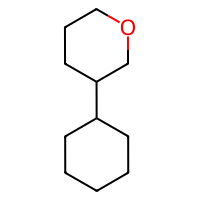
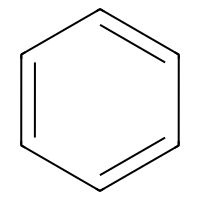
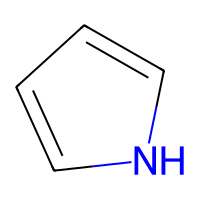
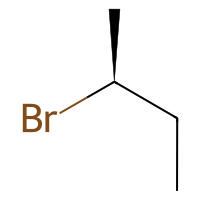
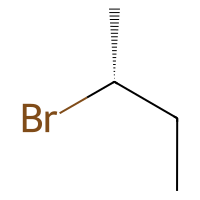
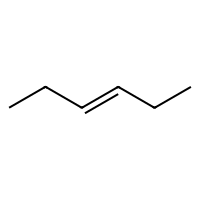
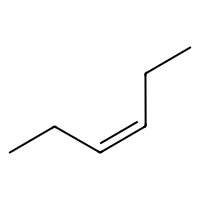

In [50]:
multiple_compounds_df

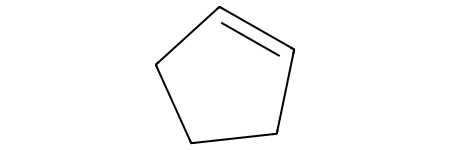

In [51]:
multiple_compounds_df.iloc[0][1]

#### 4.2 Convert to SMILES

In [52]:
smiles_list = [Chem.MolToSmiles(mol) for mol in multiple_compounds_df['Molecule']]
smiles_list

['C1=CCCC1',
 'CC#CCCC',
 'CCO',
 'CC[O-]',
 'CC[O-].[Na+]',
 'CC=CC(C)=O',
 'C1CCC2CCCCC2CC1',
 'C1CCC(C2CCCOC2)CC1',
 'c1ccccc1',
 'c1cc[nH]c1',
 'CC[C@H](C)Br',
 'CC[C@@H](C)Br',
 'CC/C=C/CC',
 'CC/C=C\\CC']

In [53]:
multiple_compounds_df['SMILES'] = smiles_list

,ID,Molecule,SMILES
0,,,C1=CCCC1
1,,,CC#CCCC
2,,,CCO
3,,,CC[O-]
4,,,CC[O-].[Na+]
5,,,CC=CC(C)=O
6,,,C1CCC2CCCCC2CC1
7,,,C1CCC(C2CCCOC2)CC1
8,,,c1ccccc1
9,,,c1cc[nH]c1

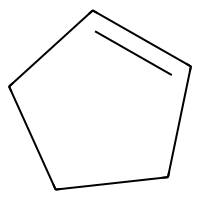
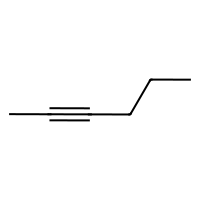
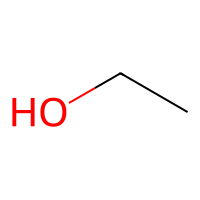
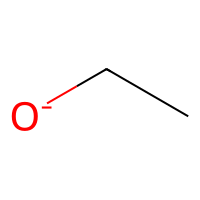
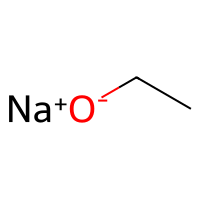
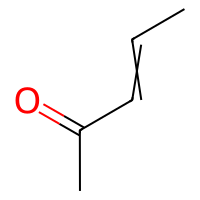
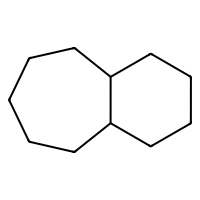
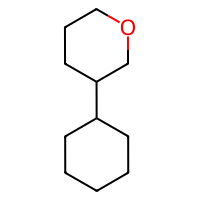
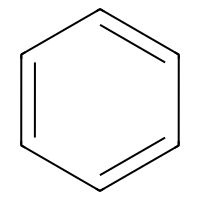
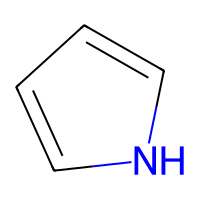
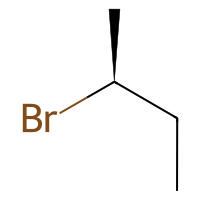
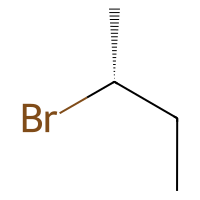
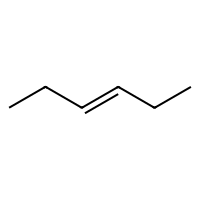
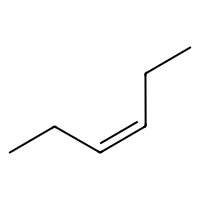

In [54]:
multiple_compounds_df

#### 4.3 Convert to SMARTS

In [55]:
smarts_list = [Chem.MolToSmarts(mol) for mol in multiple_compounds_df['Molecule']]

In [56]:
smarts_list

['[#6]1-[#6]-[#6]-[#6]=[#6]-1',
 '[#6]-[#6]-[#6]-[#6]#[#6]-[#6]',
 '[#6]-[#6]-[#8]',
 '[#6]-[#6]-[#8-]',
 '[#6]-[#6]-[#8-].[Na+]',
 '[#6]-[#6]=[#6]-[#6](=[#8])-[#6]',
 '[#6]12-[#6]-[#6]-[#6]-[#6]-[#6]-1-[#6]-[#6]-[#6]-[#6]-[#6]-2',
 '[#6]1-[#6]-[#6]-[#6]-[#6]-[#6]-1-[#6]1-[#6]-[#6]-[#6]-[#8]-[#6]-1',
 '[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1',
 '[#6]1:[#6]:[#7H]:[#6]:[#6]:1',
 '[#6]-[#6]-[#6@H](-[#6])-[#35]',
 '[#6]-[#6]-[#6@@H](-[#6])-[#35]',
 '[#6]-[#6]/[#6]=[#6]/[#6]-[#6]',
 '[#6]-[#6]/[#6]=[#6]\\[#6]-[#6]']

In [57]:
multiple_compounds_df['SMARTS'] = smarts_list

,ID,Molecule,SMILES,SMARTS
0,,,C1=CCCC1,[#6]1-[#6]-[#6]-[#6]=[#6]-1
1,,,CC#CCCC,[#6]-[#6]-[#6]-[#6]#[#6]-[#6]
2,,,CCO,[#6]-[#6]-[#8]
3,,,CC[O-],[#6]-[#6]-[#8-]
4,,,CC[O-].[Na+],[#6]-[#6]-[#8-].[Na+]
5,,,CC=CC(C)=O,[#6]-[#6]=[#6]-[#6](=[#8])-[#6]
6,,,C1CCC2CCCCC2CC1,[#6]12-[#6]-[#6]-[#6]-[#6]-[#6]-1-[#6]-[#6]-[#...
7,,,C1CCC(C2CCCOC2)CC1,[#6]1-[#6]-[#6]-[#6]-[#6]-[#6]-1-[#6]1-[#6]-[#...
8,,,c1ccccc1,[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1
9,,,c1cc[nH]c1,[#6]1:[#6]:[#7H]:[#6]:[#6]:1

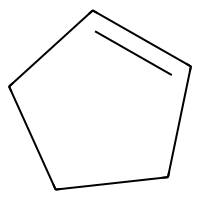
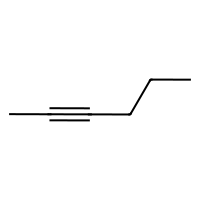
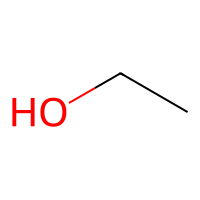
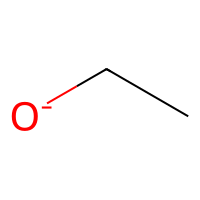
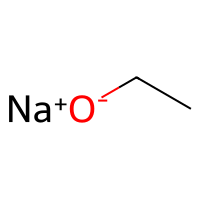
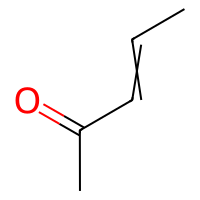
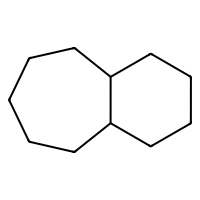
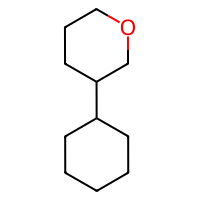
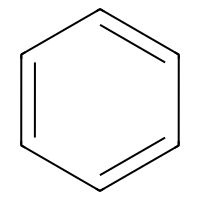
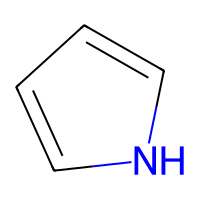
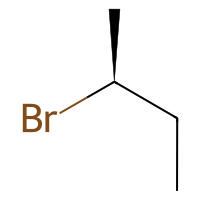
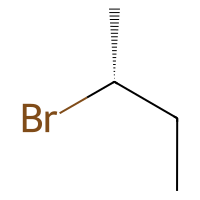
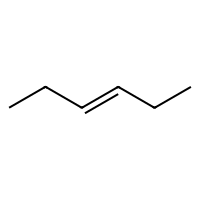
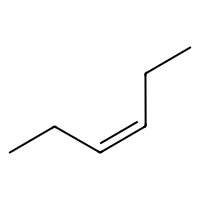

In [58]:
multiple_compounds_df

Let's save it as csv file

In [59]:
multiple_compounds_df.to_csv('multiple_compounds.csv', index=False)

Let's save it as smiles files

In [60]:
PandasTools.SaveSMILESFromFrame(multiple_compounds_df, 'multiple_compounds.smi', molCol='Molecule')